C:\Users\user\anaconda3\lib\site-packages\evds\__init__.py:42: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  main_categories_df = pd.DataFrame(main_categories_raw, dtype="int")[["CATEGORY_ID","TOPIC_TITLE_" + self.lang]]
C:\Users\user\anaconda3\lib\site-packages\evds\__init__.py:180: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(data, dtype="float")


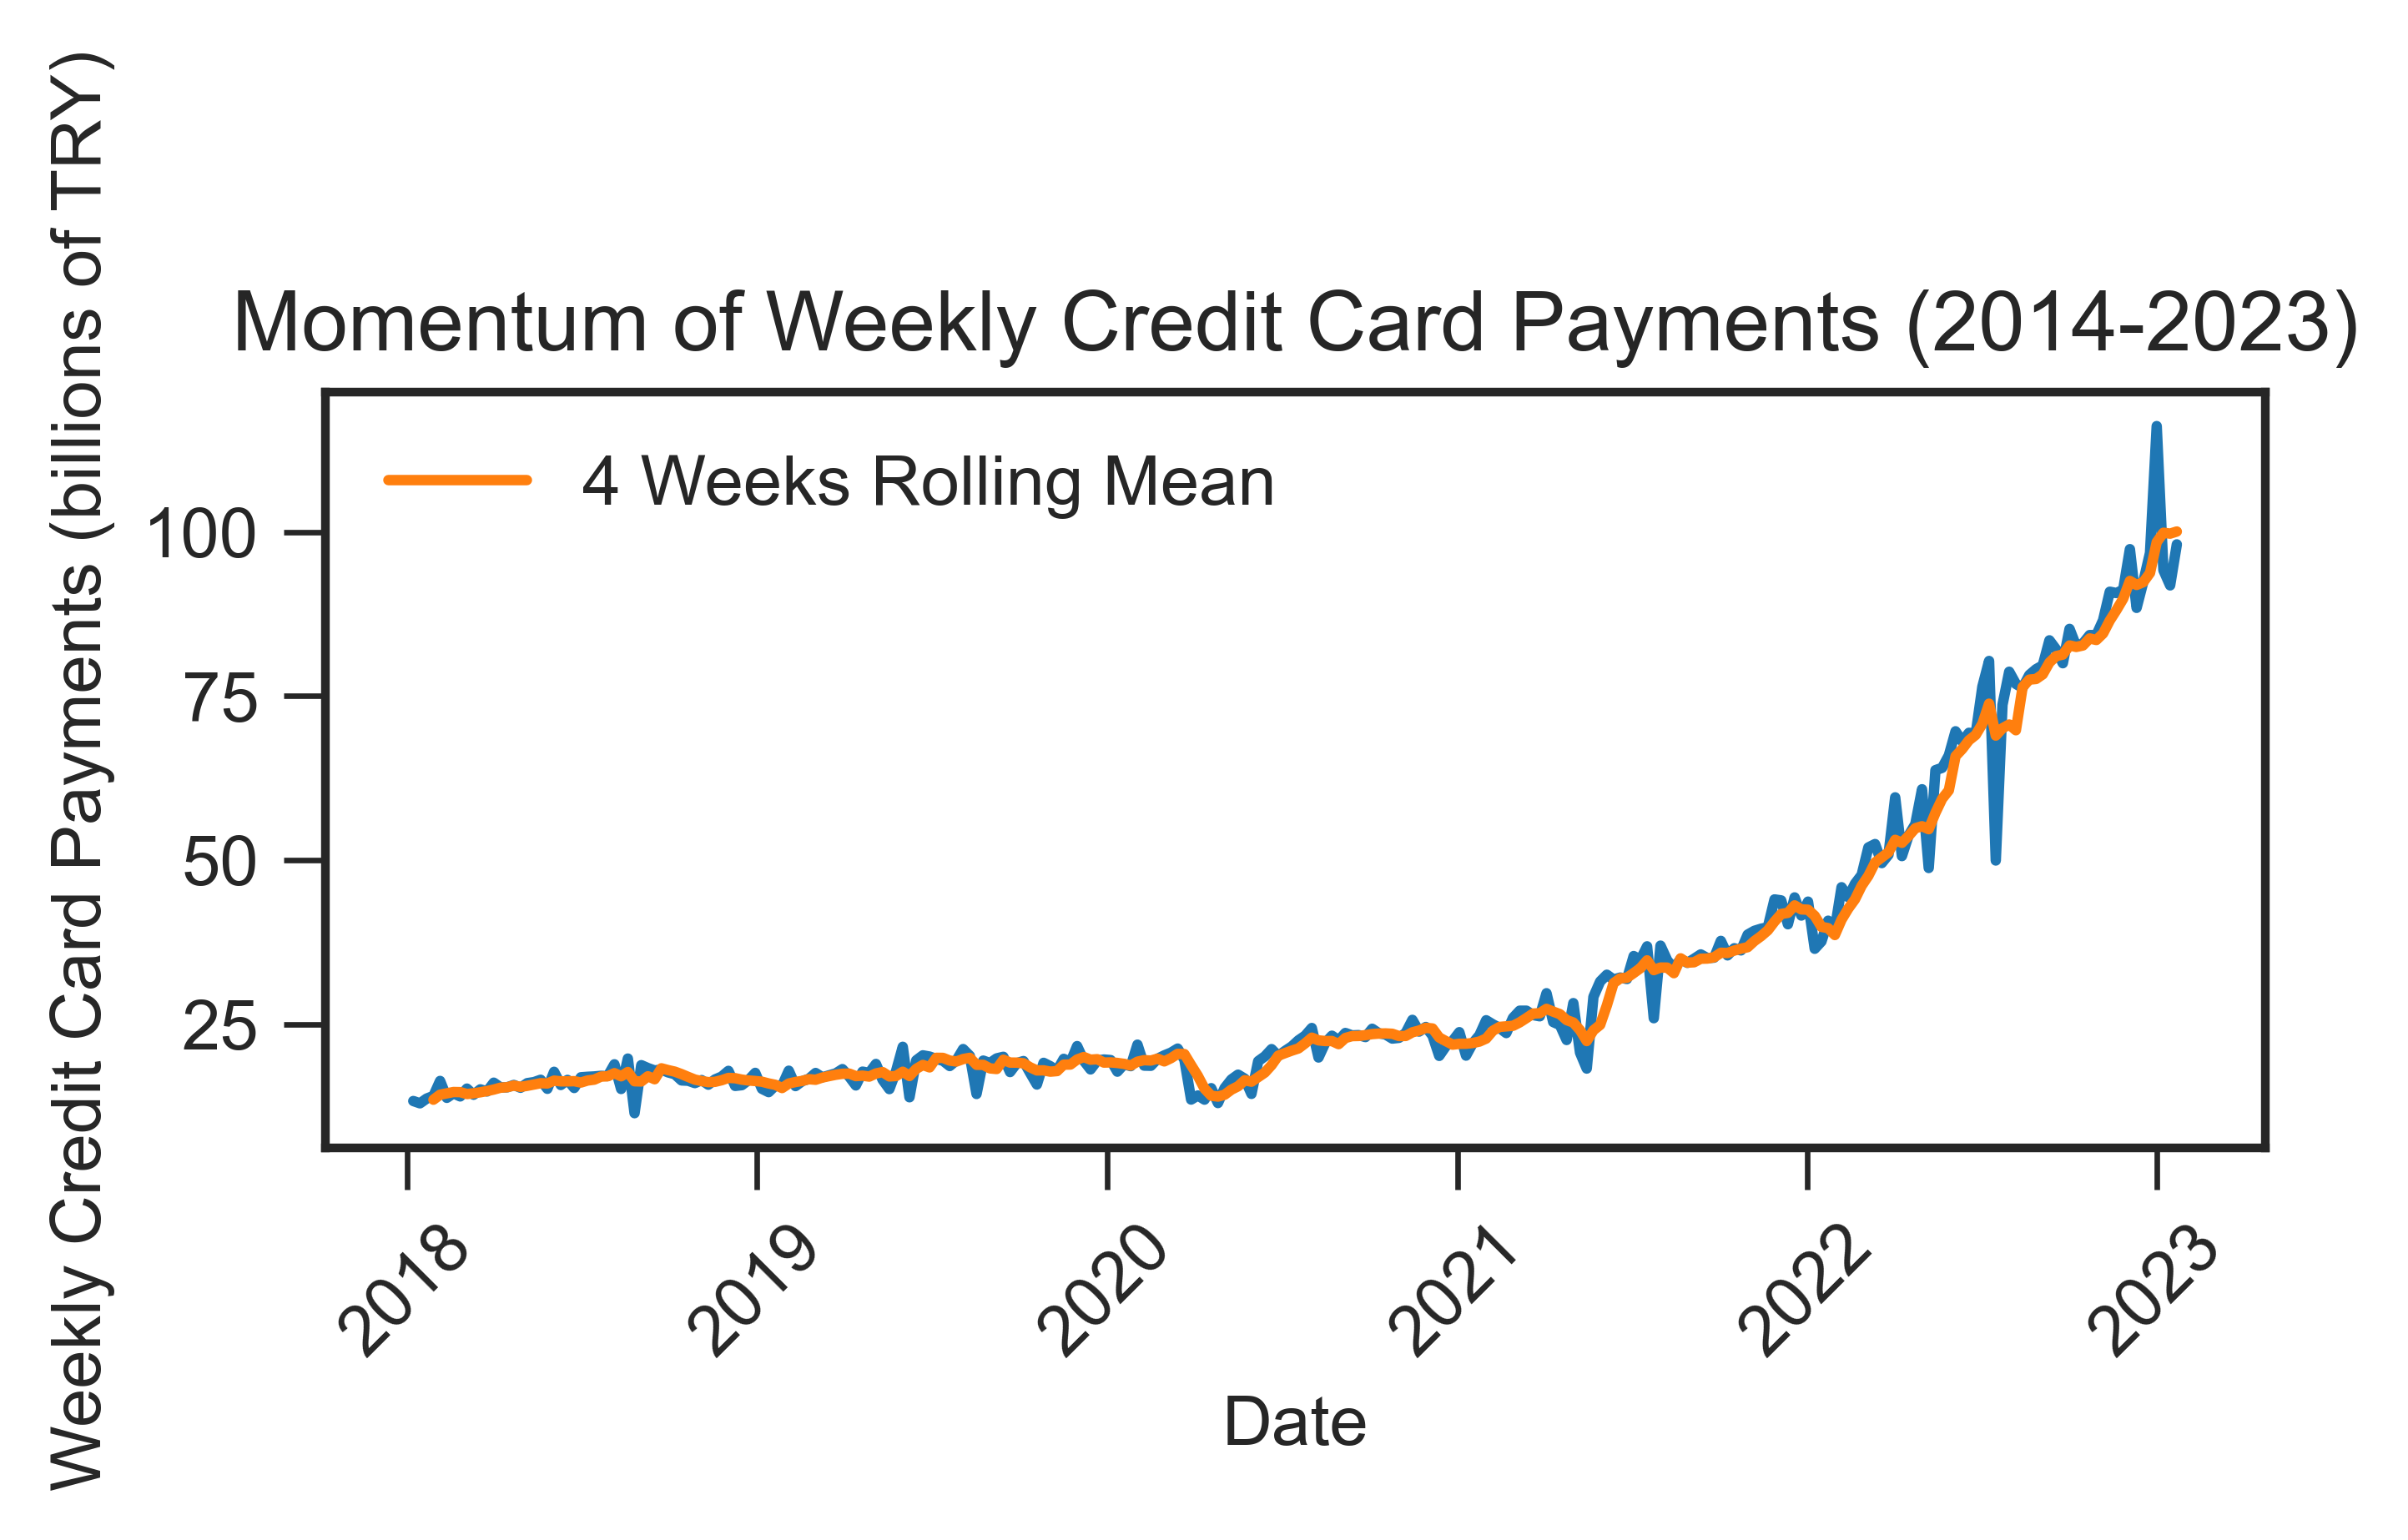

<Figure size 1500x600 with 0 Axes>

In [1]:
from evds import evdsAPI
evds= evdsAPI('IvCWuy3TWo')
evds.main_categories


import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def sma4weeks(var1, var2, sd, ed):
    
   

    # Load data and format the date column
    df = evds.get_data([var1], startdate = sd, enddate = ed)
    df['Tarih'] = pd.to_datetime(df['Tarih'], dayfirst=True)

    # Calculate the weekly sum of credit card payments
    weekly_payments = df.groupby(pd.Grouper(key='Tarih', freq='W')).sum()

    # Divide the TP_KKHARTUT_KT1 values by 1e6 to show them in millions
    weekly_payments[var2] = weekly_payments[var2] / 1e6

    # Plot the weekly payments using a single moving average
    sns.lineplot(data=weekly_payments, x=weekly_payments.index, y='TP_KKHARTUT_KT1')

    # Calculate the single moving average of the weekly payments
    window_size = 4 # Use 4 weeks as the window size
    rolling_mean = weekly_payments[var2].rolling(window=window_size).mean()
    
     # Code for greater graph.
    %matplotlib inline
    %config InlineBackend.figure_format = 'retina'
    plt.style.use('seaborn-ticks')
    plt.rcParams['figure.figsize'] = [5, 2] 
    plt.rcParams['figure.dpi'] = 300 

    # Plot the single moving average on top of the weekly payments
    sns.lineplot(data=rolling_mean, x=rolling_mean.index, y=rolling_mean, label='4 Weeks Rolling Mean')

    # Label the x and y axes and add a title to the plot
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Weekly Credit Card Payments (billions of TRY)', fontsize=10)
    plt.title('Momentum of Weekly Credit Card Payments (2014-2023)', fontsize=12)

    # Rotate the x axis dates to make them easier to read
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()
    plt.savefig("Momentum of Weekly Credit Card Payments 2014-2023.png")

# You can easily change variables and apply sma function for any data that you want. Be aware that Credit Card and Bank Card payments are weekly data.
var1="TP.KKHARTUT.KT1"
var2="TP_KKHARTUT_KT1"    
sd = "01-01-2018"
ed = "30-01-2023"

sma4weeks(var1,var2,sd,ed)